# Analyzing [Stack Overflow Annual Developer Surveys](https://insights.stackoverflow.com/survey).

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999

In [3]:
surveys = {
    "2011": {
        "data": "2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2012": {
        "data": "2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2013": {
        "data": "2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2014": {
        "data": "2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2015": {
        "data": "2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2016": {
        "data": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv",
        "readme": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/READ_ME_-_The_Public_2016_Stack_Overflow_Developer_Survey_Results.txt",
        "schema": None
    },
    "2017": {
        "data": "developer_survey_2017/survey_results_public.csv",
        "readme": "developer_survey_2017/README_2017.txt",
        "schema": "developer_survey_2017/survey_results_schema.csv"
    },
    "2018": {
        "data": "developer_survey_2018/survey_results_public.csv",
        "readme": "developer_survey_2018/README_2018.txt",
        "schema": "developer_survey_2018/survey_results_schema.csv"
    },
    "2019": {
        "data": "developer_survey_2019/survey_results_public.csv",
        "readme": "developer_survey_2019/README_2019.txt",
        "schema": "developer_survey_2019/survey_results_schema.csv"
    },
    "2020": {
        "data": "developer_survey_2020/survey_results_public.csv",
        "readme": "developer_survey_2020/README_2020.txt",
        "schema": "developer_survey_2020/survey_results_schema.csv"
    }
}

In [4]:
mapping = {
    "What Country or Region do you live in?": "Country",
    "How old are you?": "Age",
    "age_midpoint": "Age",
    "How many years of IT/Programming experience do you have?": "YearsCode",
    "Which best describes the size of your company?": "OrgSize",
    "How many developers are employed at your company?": "OrgSize",
    "company_size_range": "OrgSize",
    "Which of the following best describes your occupation?": "Employment",
    "What type of project are you developing?": "DevType",
    "Including bonus, what is your annual compensation in USD?": "ConvertedComp"
}

In [5]:
def search_schema(df, string):
    """Searches schema's DataFrame columns 'Question' for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        DataFrame containing labels and questions with the matched word.
    """
    if 'Question' in df.columns:
        return df[df['Question'].str.contains('\W*'+string+'\W*', case=False, regex=True)]
    return df[df['QuestionText'].str.contains('\W*'+string+'\W*', case=False, regex=True)]

def search_columns(df, string):
    """Searches DataFrame's columns for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        List containing all the columns with the word match.
    """
    return df.columns[df.columns.str.contains('\W*'+string+'\W*', case=False, regex=True)].tolist()

In [ ]:
survey_2011 = pd.read_csv(surveys['2011']['data'])
survey_2011.head()

In [ ]:
survey_2011.columns.tolist()

In [ ]:
survey_2011['What Country or Region do you live in?'].value_counts()

In [ ]:
survey_2011['How many years of IT/Programming experience do you have?'].value_counts()

In [ ]:
survey_2011['How would you best describe the industry you work in?'].value_counts()

In [ ]:
survey_2011['How old are you?'].value_counts()

In [ ]:
survey_2011['Which best describes the size of your company?'].value_counts()

In [ ]:
survey_2011['Which of the following best describes your occupation?'].value_counts()

In [ ]:
survey_2011['Please rate your job/career satisfaction'].value_counts()

In [ ]:
survey_2011['Including bonus, what is your annual compensation in USD?'].value_counts()

In [ ]:
survey_2011['What type of project are you developing?'].value_counts()

In [ ]:
survey_2011_map = {
    "What Country or Region do you live in?",
    "How old are you?",
    "How many years of IT/Programming experience do you have?",
#     "How would you best describe the industry you work in?",
    "Which best describes the size of your company?",
    "Which of the following best describes your occupation?",
    "What type of project are you developing?",
    "Including bonus, what is your annual compensation in USD?"
}

In [ ]:
survey_2011[survey_2011_features].info()

In [ ]:
survey_2012 = pd.read_csv(surveys['2012']['data'])
survey_2012[[col for col in survey_2012.columns if 'Unnamed' not in col]].info()

In [ ]:
for col in survey_2011_features:
    if col not in survey_2012.columns:
        print(col)

In [ ]:
survey_2012_features = survey_2011_features.copy()
# survey_2012_features.remove('How would you best describe the industry you work in?')
# survey_2012_features.append('How would you best describe the industry you currently work in?')

In [ ]:
survey_2012[survey_2012_features].info()

In [ ]:
for k, v in surveys.items():
    current_survey = pd.read_csv(v['data'], low_memory=False)
    exploring_columns = [col for col in current_survey.columns if 'Unnamed' not in col]
    print(f"Survey: {k}", current_survey[exploring_columns].info(), "="*50, sep="\n")

In [ ]:
survey_2017 = pd.read_csv(surveys['2017']['data'])
survey_2017.head()

In [ ]:
survey_2017_schema = pd.read_csv(surveys['2017']['schema'])
survey_2017_schema

In [ ]:
search_schema(pd.read_csv(surveys['2017']['schema']), 'age')

In [ ]:
search_schema(pd.read_csv(surveys['2020']['schema']), 'salary')

In [ ]:
survey_2020_features = {
    "Country": "Country",
    "Age": "Age",
    "YearsCode": "YearsCode",
    "OrgSize": "OrgSize",
    "Employment": "Employment",
    "DevType": "DevType",
    "ConvertedComp": "ConvertedComp"
}

In [ ]:
survey_2019 = pd.read_csv(surveys['2019']['data'])
survey_2019[survey_2020_features].info()

In [ ]:
survey_2011_map = {
    "Country": "What Country or Region do you live in?",
    "Age": "How old are you?",
    "YearsCode": "How many years of IT/Programming experience do you have?",
    "OrgSize": "Which best describes the size of your company?",
    "Employment": "Which of the following best describes your occupation?",
    "DevType": "What type of project are you developing?",
    "ConvertedComp": "Including bonus, what is your annual compensation in USD?"
}

In [ ]:
survey_2011_features

In [ ]:
survey_2020 = pd.read_csv(surveys['2020']['data'])
survey_2020['Employment'].value_counts()

In [ ]:
survey_2020['MainBranch'].value_counts()

In [ ]:
survey_2020['CompTotal'].value_counts(normalize=True, bins=10)

In [ ]:
for k, v in surveys.items():
    survey = pd.read_csv(v['data'], low_memory=True)
    print(k, "="*50, "\n")
    survey.rename(mapping, inplace=True)

In [ ]:
dfs = []
for k, v in surveys.items():
    if int(k) <= 2016:
        continue
    survey = pd.read_csv(v['data'], low_memory=True)
    survey.rename(mapping, axis=1,inplace=True)
    print(k)
    dfs.append(survey[set(mapping.values())])
df = pd.concat(dfs, keys=surveys.keys())

In [ ]:
list(set(mapping.values()))

In [ ]:
survey_2014 = pd.read_csv(surveys['2014']['data'])
survey_2015 = pd.read_csv(surveys['2015']['data'], skiprows=[0])
survey_2016 = pd.read_csv(surveys['2016']['data'])
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=True)

In [ ]:
search_columns(survey_2017, 'old')

In [ ]:
search_schema(pd.read_csv(surveys['2017']['schema'], low_memory=True), ' ')

Looks like only a few amount of questions could be analyzed in the context of time.
I abandon the main idea and now will search for fun questions in the context of salary, gender, age, country, time.

In [ ]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2017.shape

(51392, 154)

In [8]:
intervals = [i for i in range(10000, 100001, 10000)] + [i for i in range(120000, 200001, 20000)]

def process_salary(df):
    dataframe = df.copy()
    dataframe = dataframe.dropna(subset=['Salary'], axis=0)
    dataframe['Salary'] = dataframe['Salary'].apply(lambda x: intervals[np.argmin(abs(np.array(intervals) - x))])
    return dataframe

def process_overpaid(df):
    dataframe = df.copy()
    dataframe['Overpaid'] = dataframe['Overpaid'].fillna('Unknown')
    return dataframe

def make_dummies(df, col, prefix):
    dataframe = pd.get_dummies(df, columns=[col], prefix=prefix)
    return dataframe

survey_2017_clean = survey_2017.copy()
survey_2017_clean = process_salary(survey_2017_clean)
survey_2017_clean = process_overpaid(survey_2017_clean)
overpaid_list = ['Overpaid_'+i for i in survey_2017_clean['Overpaid'].unique()]
survey_2017_clean = make_dummies(survey_2017_clean, 'Overpaid', 'Overpaid')

In [9]:
set(survey_2017_clean.columns).difference(set(survey_2017))

{'Overpaid_Greatly overpaid',
 'Overpaid_Greatly underpaid',
 'Overpaid_Neither underpaid nor overpaid',
 'Overpaid_Somewhat overpaid',
 'Overpaid_Somewhat underpaid',
 'Overpaid_Unknown'}

In [10]:
overpaid_dict = {
    "Overpaid_Greatly underpaid": "Greatly underpaid",
    "Overpaid_Somewhat underpaid": "Somewhat underpaid",
    "Overpaid_Neither underpaid nor overpaid": "Neither",
    "Overpaid_Somewhat overpaid": "Somewhat overpaid",
    "Overpaid_Greatly overpaid": "Greatly overpaid",
    "Overpaid_Unknown": "Not sure"
}

In [11]:
salary_overpaid_2017 = survey_2017_clean[['Salary']+overpaid_list].groupby(by='Salary').sum()
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Unknown,Overpaid_Greatly overpaid
Salary,,,,,,
10000,603.0,928.0,86.0,457.0,17.0,21.0
20000,295.0,466.0,43.0,156.0,1.0,10.0
30000,356.0,590.0,71.0,193.0,4.0,5.0
40000,481.0,678.0,66.0,163.0,1.0,8.0
50000,534.0,721.0,62.0,164.0,2.0,7.0
60000,474.0,592.0,88.0,121.0,2.0,4.0
70000,334.0,435.0,57.0,68.0,1.0,1.0
80000,285.0,334.0,43.0,44.0,1.0,7.0
90000,265.0,271.0,55.0,31.0,1.0,3.0


In [12]:
def convert_xticks(arr):
    result = map(lambda x: str(x//1000)+'k', arr)
    return list(result)

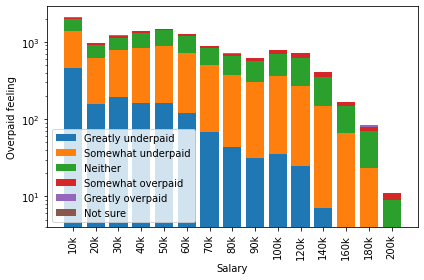

In [13]:
bottom = len(intervals) * [0]
ticks = np.arange(len(intervals))
labels = convert_xticks(intervals)

for i, overpaid in enumerate(overpaid_dict):
    plt.bar(ticks, salary_overpaid_2017[overpaid].values, bottom=bottom, align='center', log=True)
    bottom += salary_overpaid_2017[overpaid].values
    
plt.legend(overpaid_dict.values())
plt.xlabel('Salary')
plt.ylabel('Overpaid feeling')
plt.xticks(ticks, labels, rotation=90)
plt.tight_layout()
plt.show()

In [14]:
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=False)
print(survey_2018.shape, survey_2018.columns.tolist())

(98855, 129) ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'C

In [15]:
survey_2018['Exercise'].value_counts(dropna=False)

I don't typically exercise    26995
NaN                           26747
1 - 2 times per week          20932
3 - 4 times per week          14318
Daily or almost every day      9863
Name: Exercise, dtype: int64

In [16]:
survey_2018['Age'].value_counts(dropna=False)

NaN                   34281
25 - 34 years old     31759
18 - 24 years old     15249
35 - 44 years old     11477
45 - 54 years old      3313
Under 18 years old     1638
55 - 64 years old       959
65 years or older       179
Name: Age, dtype: int64

In [17]:
survey_2018['CompanySize'].value_counts(dropna=False)

NaN                         27324
20 to 99 employees          16996
100 to 499 employees        14011
10,000 or more employees     9757
10 to 19 employees           8007
1,000 to 4,999 employees     7634
Fewer than 10 employees      7479
500 to 999 employees         4630
5,000 to 9,999 employees     3017
Name: CompanySize, dtype: int64

In [18]:
survey_2018['HoursOutside'].value_counts(dropna=False)

1 - 2 hours             27788
NaN                     26831
30 - 59 minutes         24002
Less than 30 minutes    11223
3 - 4 hours              7186
Over 4 hours             1825
Name: HoursOutside, dtype: int64

In [19]:
survey_2018['YearsCoding'].value_counts(dropna=False)

3-5 years           23313
6-8 years           19338
9-11 years          12169
0-2 years           10682
12-14 years          8030
15-17 years          6117
18-20 years          5072
NaN                  5020
30 or more years     3544
21-23 years          2648
24-26 years          1862
27-29 years          1060
Name: YearsCoding, dtype: int64

In [20]:
from itertools import chain

survey_2018_clean = survey_2018.copy()
survey_2018_clean = survey_2018_clean.dropna(subset=['LanguageWorkedWith'], axis=0)
lang_list = survey_2018_clean['LanguageWorkedWith'].dropna().str.split(';').tolist()
lang_set = set(chain(*lang_list))

dummies = pd.get_dummies(survey_2018_clean['LanguageWorkedWith'].str.split(';').explode()).sum(level=0)
print(dummies.sum().sort_values(ascending=False))

survey_2018_ = pd.concat([survey_2018_clean['JobSatisfaction'], dummies], axis=1)

JavaScript              54686
HTML                    53628
CSS                     50979
SQL                     44670
Java                    35521
Bash/Shell              31172
Python                  30359
C#                      26954
PHP                     24071
C++                     19872
C                       18042
TypeScript              13626
Ruby                     7911
Swift                    6310
Assembly                 5760
Go                       5532
Objective-C              5510
VB.NET                   5254
R                        4813
Matlab                   4564
VBA                      3810
Kotlin                   3508
Scala                    3420
Groovy                   3373
Perl                     3280
Visual Basic 6           3087
Lua                      2733
CoffeeScript             2603
Delphi/Object Pascal     2025
Haskell                  1961
Rust                     1857
F#                       1115
Clojure                  1032
Erlang    

In [21]:
search_schema(pd.read_csv(surveys['2018']['schema']), 'language')

,Column,QuestionText
20,AssessJob4,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The languages, frameworks, and other technologies I'd be working with"
65,LanguageWorkedWith,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
66,LanguageDesireNextYear,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
92,AdsPriorities7,"Please rank the following advertising qualities in order of their importance to you (by dragging the choices up and down), where 1 is the most important, and 7 is the least important. The advertisement avoids fluffy or vague language"


In [22]:
pd.get_dummies(survey_2018_clean['LanguageWorkedWith'].str.split(';').explode()).sum(level=0)

,Assembly,Bash/Shell,C,C#,C++,CSS,Clojure,Cobol,CoffeeScript,Delphi/Object Pascal,...,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92514,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92515,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92517,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
language_satisfaction_2018 = survey_2018_.groupby(by='JobSatisfaction').sum().T
language_satisfaction_2018

JobSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
Assembly,152.0,726.0,297.0,1360.0,296.0,350.0,509.0
Bash/Shell,819.0,5130.0,2259.0,9896.0,1628.0,2514.0,3430.0
C,452.0,2231.0,1052.0,4467.0,972.0,1227.0,1831.0
C#,729.0,3915.0,1956.0,8367.0,1522.0,2225.0,3222.0
C++,497.0,2520.0,1163.0,5206.0,1034.0,1376.0,2107.0
CSS,1341.0,7446.0,3621.0,15199.0,2855.0,4027.0,5859.0
Clojure,37.0,202.0,85.0,292.0,51.0,87.0,94.0
Cobol,28.0,79.0,36.0,141.0,44.0,49.0,64.0
CoffeeScript,70.0,466.0,182.0,808.0,159.0,198.0,292.0
Delphi/Object Pascal,77.0,283.0,144.0,567.0,128.0,154.0,242.0


In [24]:
language_satisfaction_2018.columns.tolist()

['Extremely dissatisfied',
 'Extremely satisfied',
 'Moderately dissatisfied',
 'Moderately satisfied',
 'Neither satisfied nor dissatisfied',
 'Slightly dissatisfied',
 'Slightly satisfied']

In [25]:
columns_sorted_2018 = [
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'
]
language_satisfaction_2018 = language_satisfaction_2018[columns_sorted_2018]
language_satisfaction_2018

JobSatisfaction,Extremely dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Extremely satisfied
Assembly,152.0,297.0,350.0,296.0,509.0,1360.0,726.0
Bash/Shell,819.0,2259.0,2514.0,1628.0,3430.0,9896.0,5130.0
C,452.0,1052.0,1227.0,972.0,1831.0,4467.0,2231.0
C#,729.0,1956.0,2225.0,1522.0,3222.0,8367.0,3915.0
C++,497.0,1163.0,1376.0,1034.0,2107.0,5206.0,2520.0
CSS,1341.0,3621.0,4027.0,2855.0,5859.0,15199.0,7446.0
Clojure,37.0,85.0,87.0,51.0,94.0,292.0,202.0
Cobol,28.0,36.0,49.0,44.0,64.0,141.0,79.0
CoffeeScript,70.0,182.0,198.0,159.0,292.0,808.0,466.0
Delphi/Object Pascal,77.0,144.0,154.0,128.0,242.0,567.0,283.0


<ipython-input-26-1c6c1760db9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_satisfaction_2018['Total'] = language_satisfaction_2018.sum(axis=1)


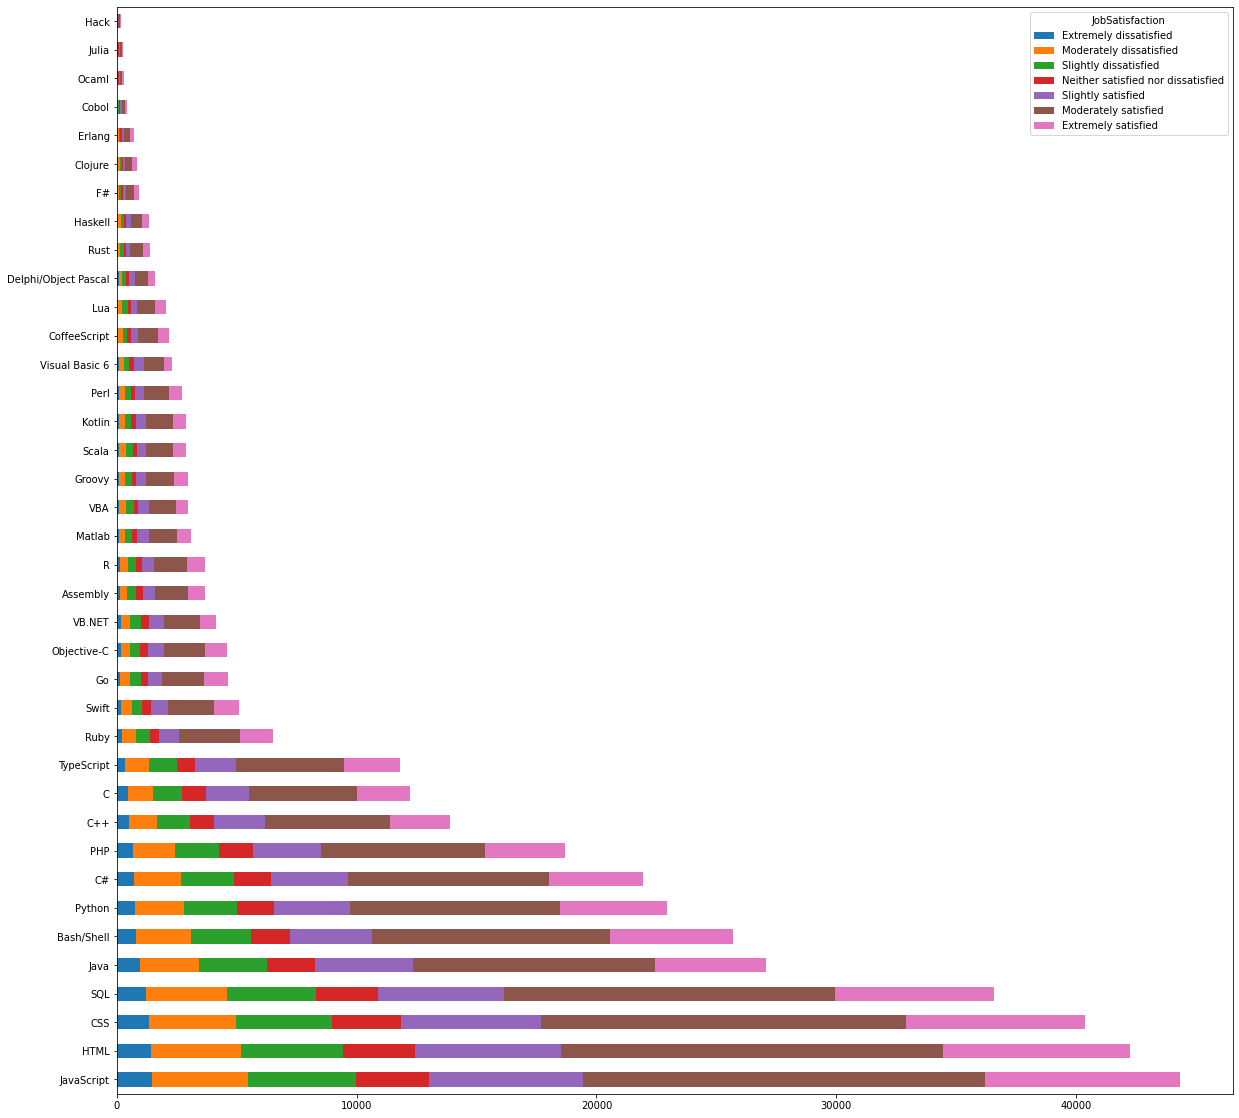

In [26]:
language_satisfaction_2018['Total'] = language_satisfaction_2018.sum(axis=1)
language_satisfaction_2018 = language_satisfaction_2018.sort_values(by='Total', ascending=False)
language_satisfaction_2018[columns_sorted_2018].plot.barh(stacked=True, figsize=(20,20));

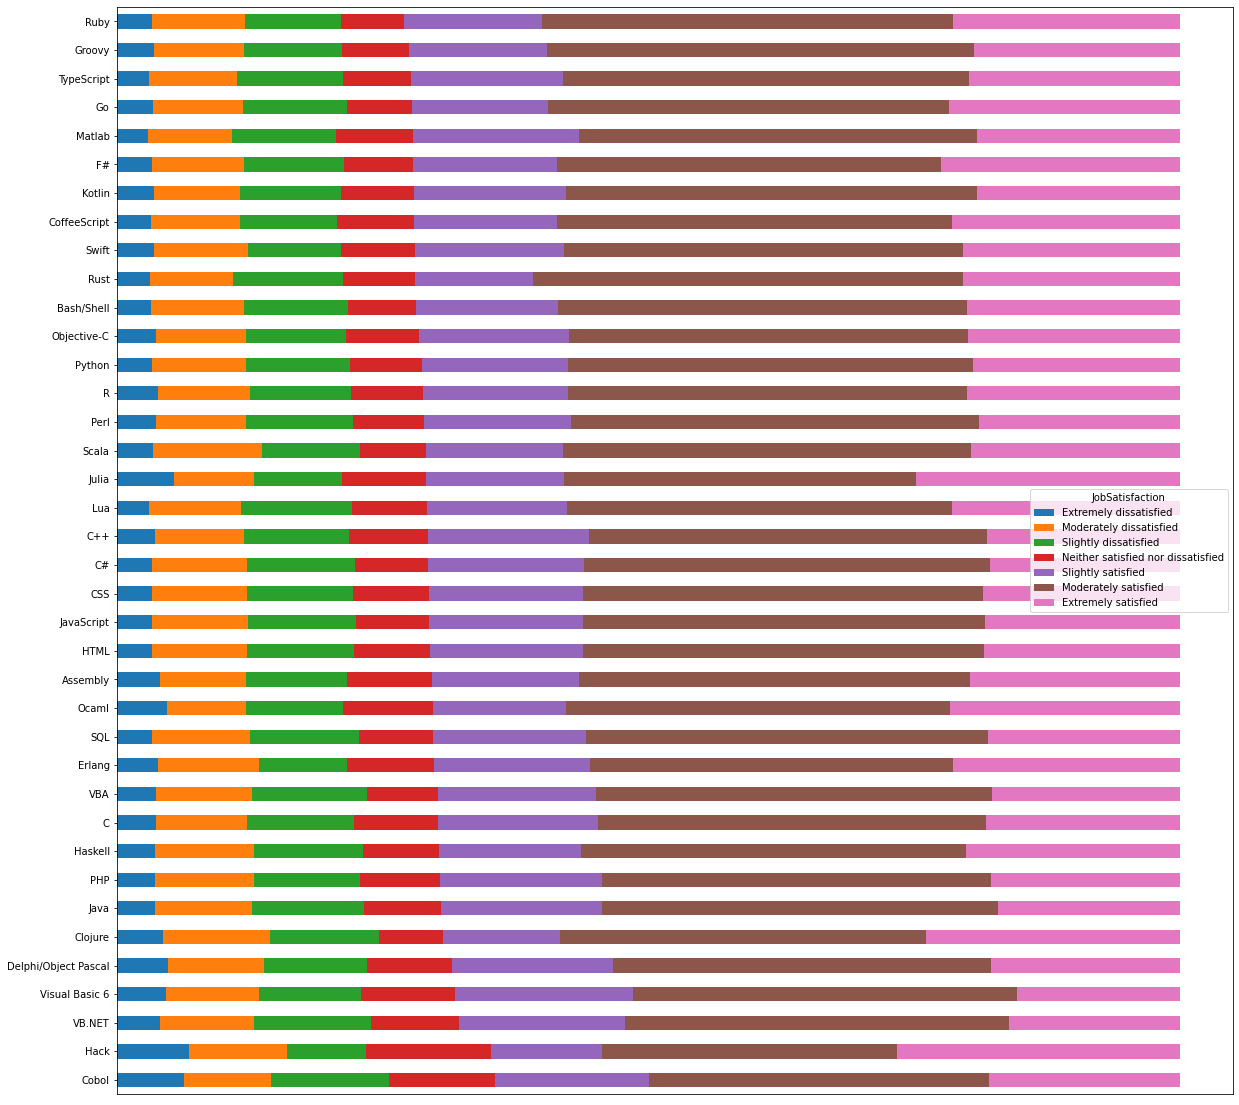

In [27]:
language_satisfaction_2018_pct = language_satisfaction_2018.copy()
# language_satisfaction_2018_pct['Total'] = language_satisfaction_2018_pct.sum(axis=1)
language_satisfaction_2018_pct['Satisfied'] = language_satisfaction_2018_pct[['Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']].sum(axis=1)
language_satisfaction_2018_pct['Dissatisfied'] = language_satisfaction_2018_pct[['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied']].sum(axis=1)
language_satisfaction_2018_pct = language_satisfaction_2018_pct.apply(lambda x: x / x['Total'], axis=1)
language_satisfaction_2018_pct.sort_values(by='Satisfied', ascending=True, inplace=True)
language_satisfaction_2018_pct[columns_sorted_2018].plot.barh(stacked=True, figsize=(20,20), xticks=[]);

In [28]:
language_satisfaction_2018_pct

JobSatisfaction,Extremely dissatisfied,Moderately dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Moderately satisfied,Extremely satisfied,Total,Satisfied,Dissatisfied
Cobol,0.063492,0.081633,0.111111,0.099773,0.145125,0.319728,0.179138,1.0,0.643991,0.256236
Hack,0.067901,0.092593,0.074074,0.117284,0.104938,0.277778,0.265432,1.0,0.648148,0.234568
VB.NET,0.040664,0.088547,0.109721,0.083013,0.155919,0.361886,0.160250,1.0,0.678056,0.238932
Visual Basic 6,0.045927,0.087522,0.096620,0.087955,0.167678,0.360919,0.153380,1.0,0.681976,0.230069
Delphi/Object Pascal,0.048276,0.090282,0.096552,0.080251,0.151724,0.355486,0.177429,1.0,0.684639,0.235110
Clojure,0.043632,0.100236,0.102594,0.060142,0.110849,0.344340,0.238208,1.0,0.693396,0.246462
Java,0.035627,0.091248,0.105403,0.073102,0.151342,0.372570,0.170707,1.0,0.694619,0.232279
PHP,0.036256,0.093183,0.099127,0.075939,0.152198,0.365929,0.177368,1.0,0.695496,0.228565
Haskell,0.035928,0.092814,0.102545,0.071856,0.133982,0.361527,0.201347,1.0,0.696856,0.231287
C,0.036952,0.086004,0.100311,0.079464,0.149689,0.365190,0.182390,1.0,0.697269,0.223267


In [29]:
survey_2019 = pd.read_csv(surveys['2019']['data'], low_memory=False)
print(survey_2019.shape, survey_2019.columns.tolist())

(88883, 85) ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFr

In [30]:
survey_2019['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                                             1483
C#;HTML/CSS;JavaScript;SQL                                                                                              1414
HTML/CSS;JavaScript                                                                                                     1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                    990
Java                                                                                                                     934
                                                                                                                        ... 
Bash/Shell/PowerShell;Clojure;Go;Java;JavaScript;Python;TypeScript                                                         1
Bash/Shell/PowerShell;C;Java;Python;R;Swift;VBA                                                                            1


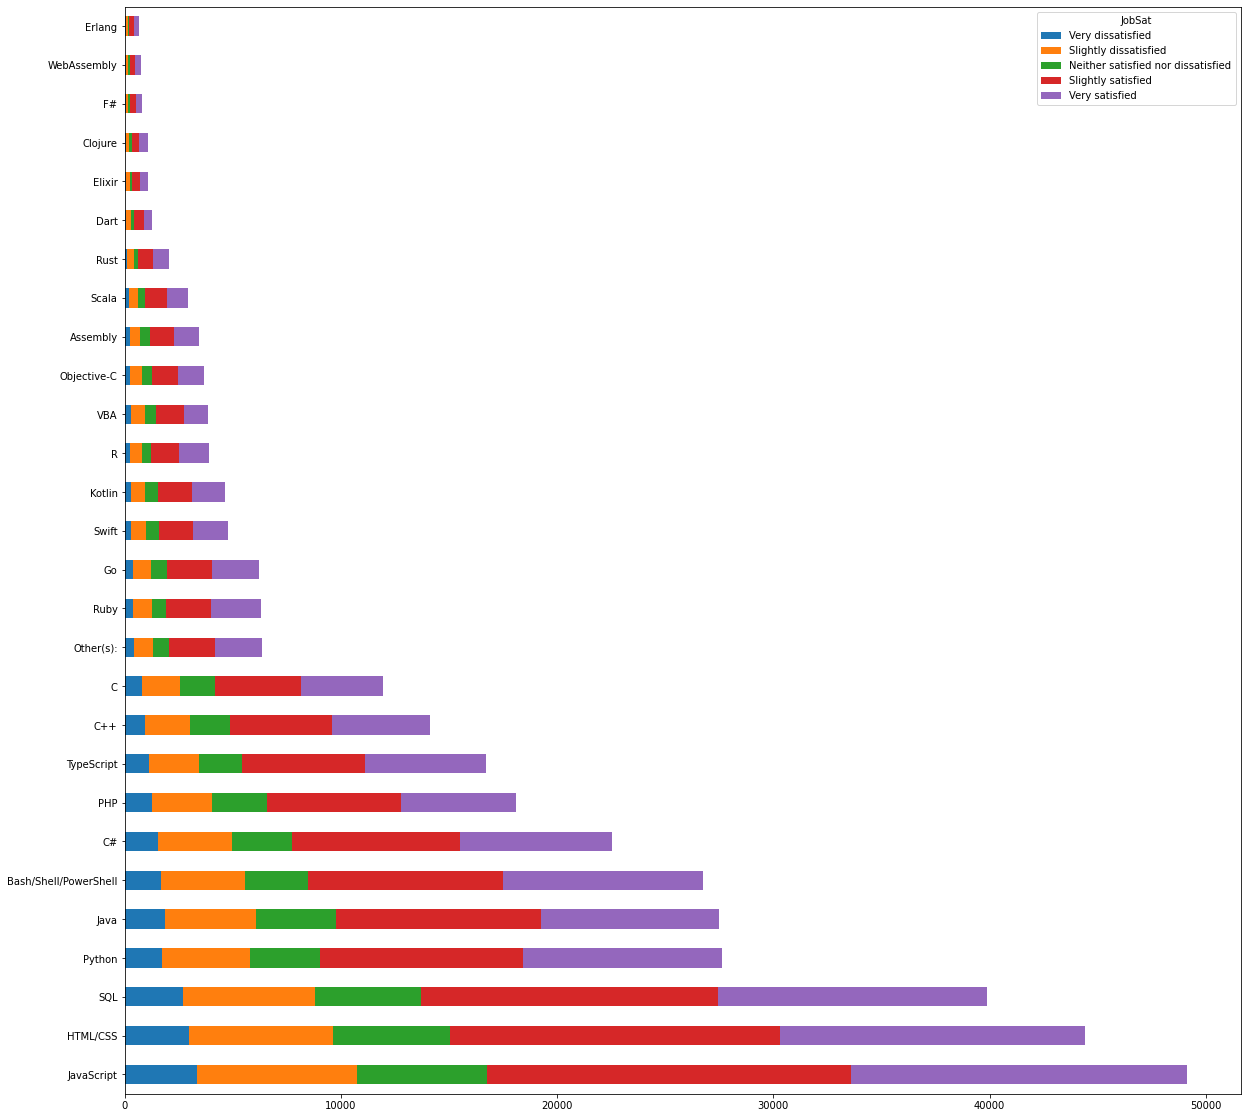

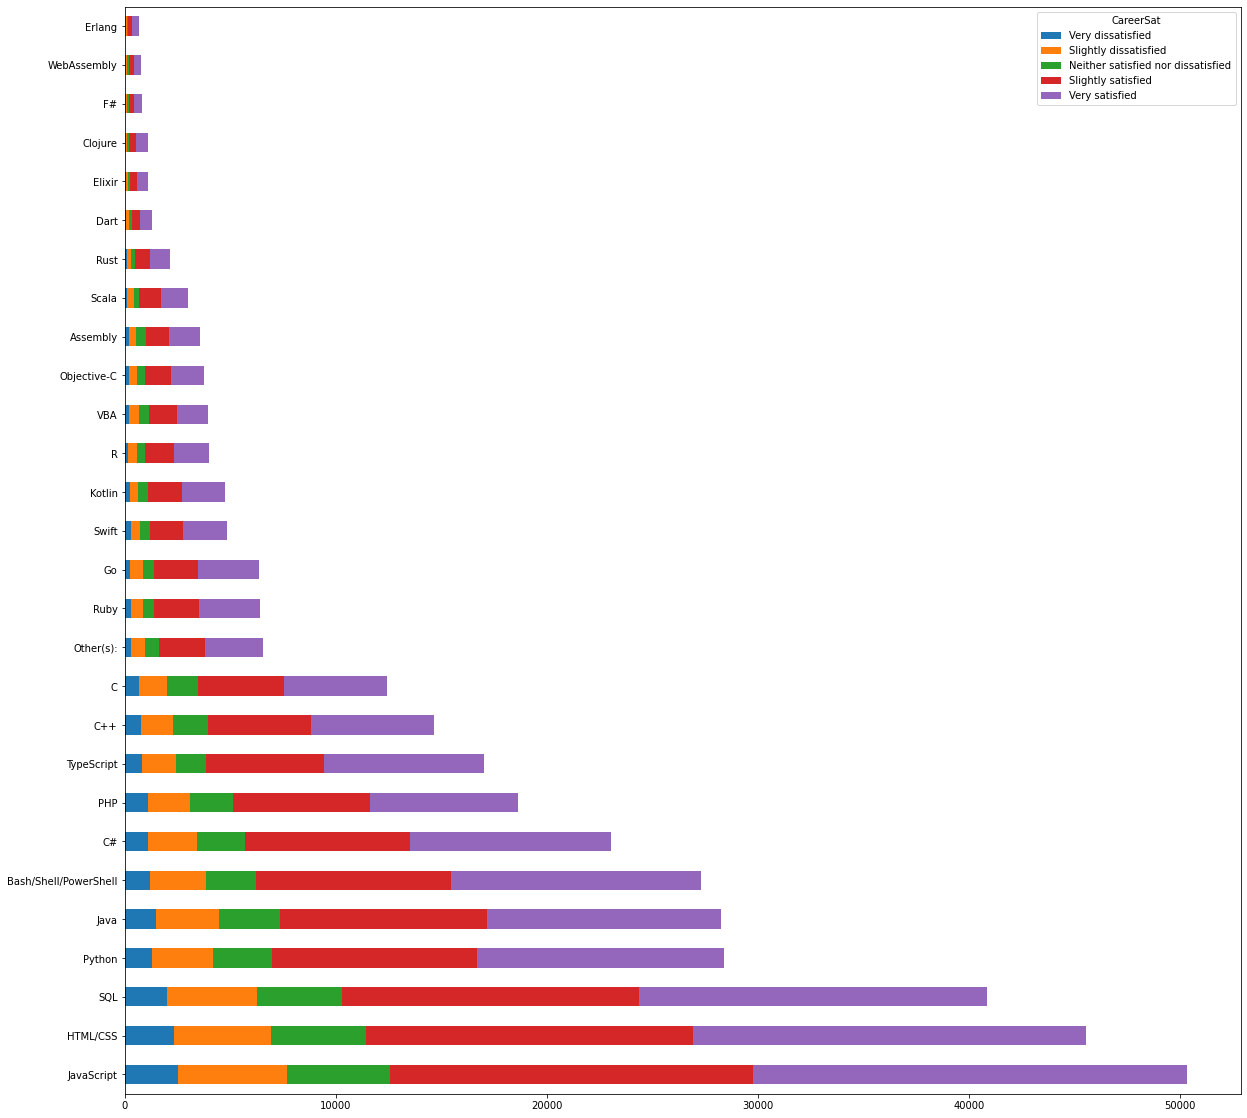

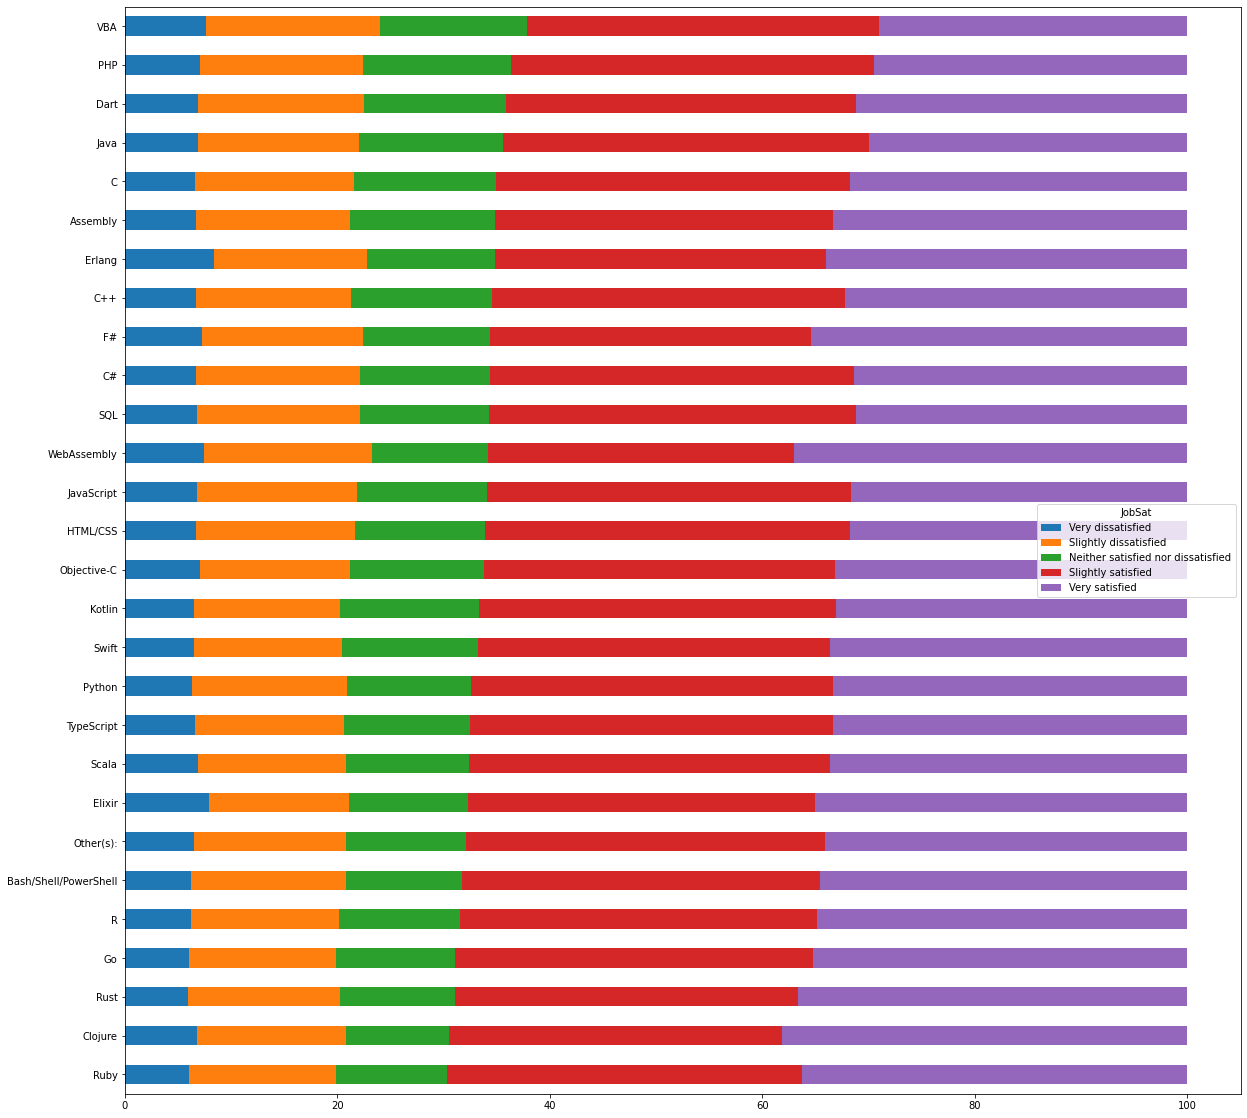

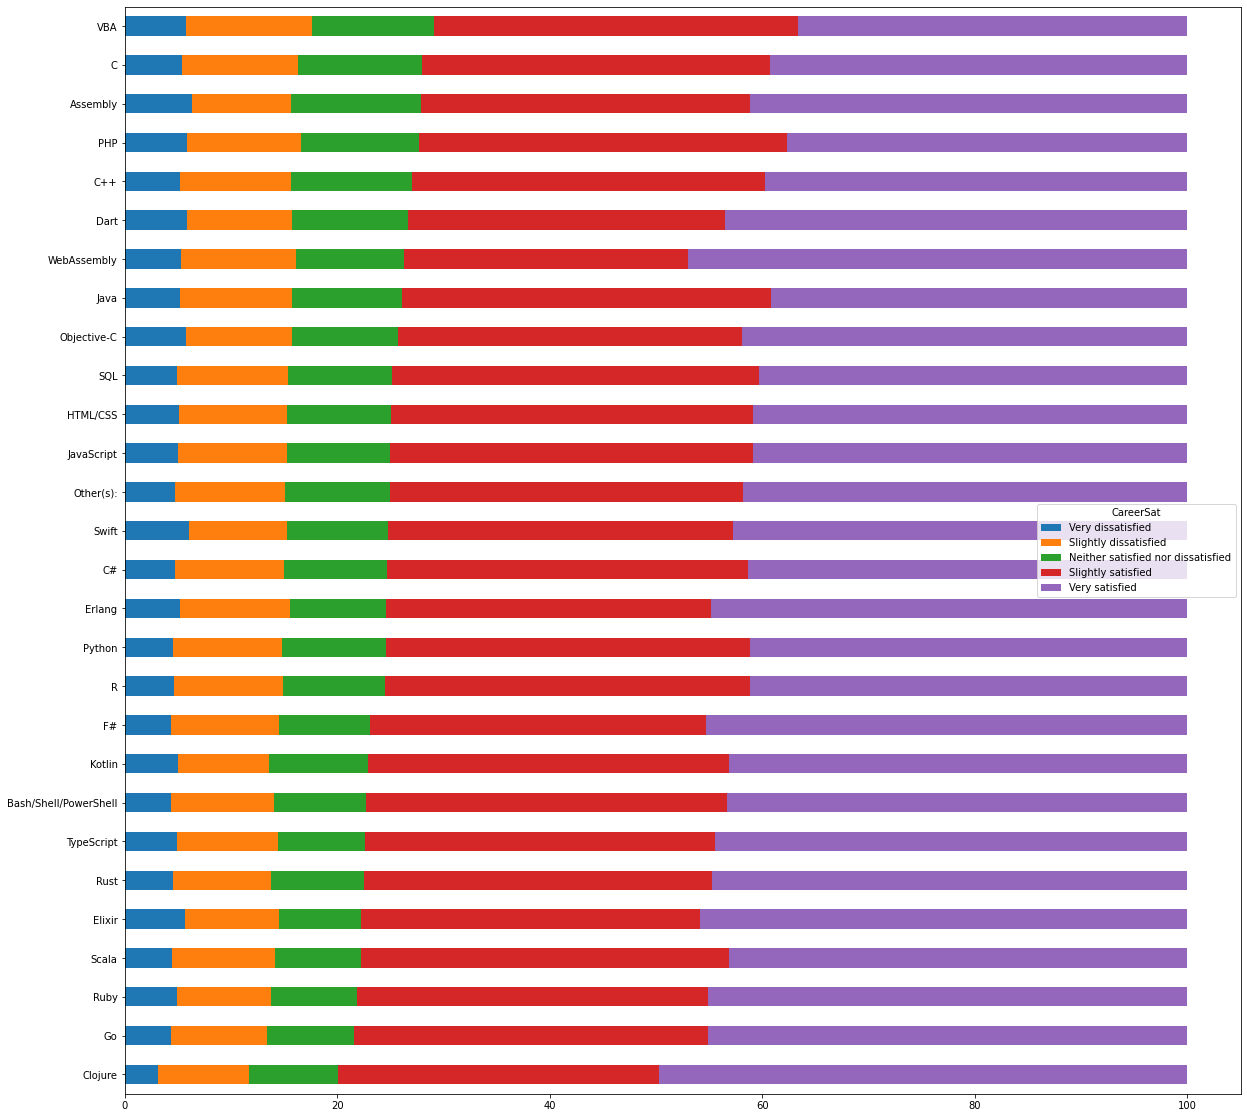

In [59]:
def list_to_dummies(col, sep=";"):
    """Converts list values in the series to dummies df.
    Args:
      col (Pandas.Series): Column with lists, that will be separated and exploded.
      sep (str): Separator of the list values.
    Returns:
      Pandas.DataFrame with dummies from initial column list values.
    """
    split = col.str.split(sep)
    explode = split.explode()
    dummies = pd.get_dummies(explode)
    return dummies.sum(level=0)

def plot_pair(df, group, col_order):
    groupped = df.copy()
    groupped = groupped.groupby(by=group).sum().T
    groupped['Total'] = groupped.sum(axis=1)
    groupped = groupped.sort_values(by='Total', ascending=False)
    groupped[col_order].plot.barh(stacked=True, figsize=(20,20))

def plot_pair_pct(df, group, col_order):
    groupped = df.copy()
    groupped = groupped.groupby(by=group).sum().T
    groupped['Total'] = groupped.sum(axis=1)
    groupped_pct = groupped.apply(lambda x: x*100 / x['Total'], axis=1)
    groupped_pct['Satisfaction'] = groupped_pct[col_order[-2:]].sum(axis=1)
    groupped_pct = groupped_pct.sort_values(by='Satisfaction', ascending=False)
    groupped_pct[col_order].plot.barh(stacked=True, figsize=(20,20))
    
dummies = list_to_dummies(survey_2019['LanguageWorkedWith'])
survey_2019_clean = pd.concat([survey_2019[['JobSat', 'CareerSat']], dummies], axis=1)
plot_pair(survey_2019_clean, 'JobSat', columns_sorted_2019)
plot_pair(survey_2019_clean, 'CareerSat', columns_sorted_2019)
plot_pair_pct(survey_2019_clean, 'JobSat', columns_sorted_2019)
plot_pair_pct(survey_2019_clean, 'CareerSat', columns_sorted_2019)

In [34]:
survey_2019['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [35]:
survey_2019['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [42]:
columns_sorted_2019 = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]